In [1]:
import pandas as pd
import cv2
from matplotlib.image import imshow
import os

In [ ]:
BASE_PATH = './'

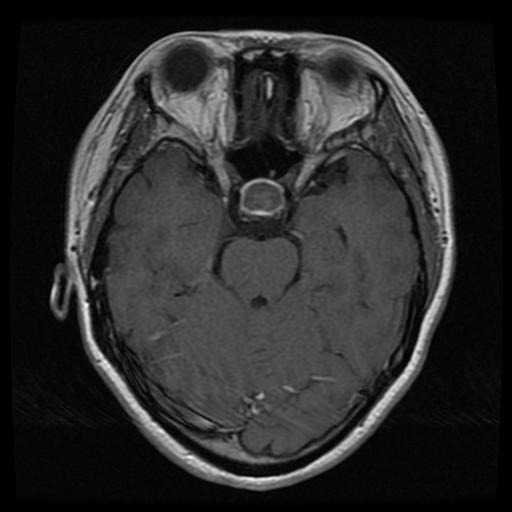

In [ ]:
image = cv2.imread(f'{BASE_PATH}/Training/pituitary/Tr-piTr_0001.jpg', cv2.COLOR_BGR2GRAY)
imshow(image)

In [ ]:
# classes = {
#     0: 'glioma',
#     1: 'meningioma',
#     2: 'notumor',
#     3: 'pituitary'
# }

In [ ]:
classes = {
    'glioma': 0,
    'meningioma': 1,
    'notumor': 2,
    'pituitary': 3
}

In [ ]:
class_path = "/content/drive/MyDrive/Colab Notebooks/Training"
notebook_path = "/content/drive/MyDrive/Colab Notebooks/"
class_folders = os.listdir(class_path)

In [ ]:
training_df = pd.DataFrame(columns=['path', 'class', 'class_name', 'height', 'width'])

In [ ]:
for folder in class_folders:
  base_path = f'Training/{folder}/'
  df = pd.DataFrame(os.listdir(f"{class_path}/{folder}"), columns=['path'])
  df['path'] = df['path'].apply(lambda x: f'{base_path}{x}')
  training_df = pd.concat([training_df, df])
training_df['class_name'] = training_df['path'].apply(lambda x: os.path.basename(os.path.dirname(x)))
training_df['class'] = training_df['class_name'].apply(lambda x: classes[x])
training_df['height'] = training_df['path'].apply(lambda x: cv2.imread(f"{notebook_path}{x}").shape[0])
training_df['width'] = training_df['path'].apply(lambda x: cv2.imread(f"{notebook_path}{x}").shape[1])

In [ ]:
training_df

,path,class,class_name,height,width
0,Training/pituitary/Tr-pi_0482.jpg,3,pituitary,512,512
1,Training/pituitary/Tr-pi_0460.jpg,3,pituitary,512,512
2,Training/pituitary/Tr-pi_0481.jpg,3,pituitary,512,512
3,Training/pituitary/Tr-pi_0462.jpg,3,pituitary,512,512
4,Training/pituitary/Tr-pi_0478.jpg,3,pituitary,512,512
...,...,...,...,...,...
1590,Training/notumor/Tr-no_0592.jpg,2,notumor,236,214
1591,Training/notumor/Tr-no_0618.jpg,2,notumor,630,630
1592,Training/notumor/Tr-no_0605.jpg,2,notumor,236,214
1593,Training/notumor/Tr-no_0588.jpg,2,notumor,225,225


In [ ]:
class_path = "/content/drive/MyDrive/Colab Notebooks/Testing"
notebook_path = "/content/drive/MyDrive/Colab Notebooks/"
class_folders = os.listdir(class_path)

In [ ]:
test_df = pd.DataFrame(columns=['path', 'class', 'class_name', 'height', 'width'])

In [ ]:
for folder in class_folders:
  base_path = f'Testing/{folder}/'
  df = pd.DataFrame(os.listdir(f"{class_path}/{folder}"), columns=['path'])
  df['path'] = df['path'].apply(lambda x: f'{base_path}{x}')
  test_df = pd.concat([test_df, df])
test_df['class_name'] = test_df['path'].apply(lambda x: os.path.basename(os.path.dirname(x)))
test_df['class'] = test_df['class_name'].apply(lambda x: classes[x])
test_df['height'] = test_df['path'].apply(lambda x: cv2.imread(f"{notebook_path}{x}").shape[0])
test_df['width'] = test_df['path'].apply(lambda x: cv2.imread(f"{notebook_path}{x}").shape[1])

In [ ]:
test_df

,path,class,class_name,height,width
0,Testing/glioma/Te-glTr_0004.jpg,0,glioma,512,512
1,Testing/glioma/Te-gl_0017.jpg,0,glioma,512,512
2,Testing/glioma/Te-glTr_0003.jpg,0,glioma,512,512
3,Testing/glioma/Te-glTr_0006.jpg,0,glioma,512,512
4,Testing/glioma/Te-glTr_0009.jpg,0,glioma,512,512
...,...,...,...,...,...
295,Testing/pituitary/Te-pi_0267.jpg,3,pituitary,512,512
296,Testing/pituitary/Te-pi_0279.jpg,3,pituitary,512,512
297,Testing/pituitary/Te-pi_0297.jpg,3,pituitary,512,512
298,Testing/pituitary/Te-pi_0298.jpg,3,pituitary,512,512


In [ ]:
test_df.to_csv('testing_data.csv', sep=";")
test_df.to_excel('testing_data.xlsx')